In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()
['measurement', 'station']

['measurement', 'station']

In [8]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

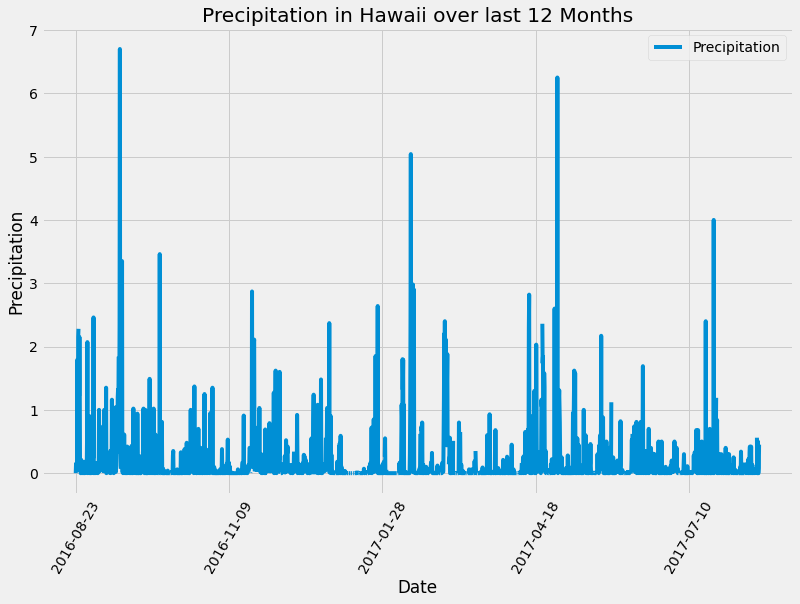

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from the last data point in the database
##First find the Last Date
session.query(Measurements.date).order_by(Measurements.date.desc()).first()
##last data point in the database is '2017-08-23'
query_date = dt.date(2017,8,23)-dt.timedelta(days=365)
#print('Query Date: ', query_date)

  

# Perform a query to retrieve the data and precipitation scores
sel = [Measurements.date, Measurements.prcp]
Last_annual_prcp = session.query(*sel).\
    filter(Measurements.date >= '2016-08-23', Measurements.date <= '2017-08-23').\
    order_by(Measurements.date).all()
Last_annual_prcp

# Save the query results as a Pandas DataFrame and set the index to the date column
measurement_data = pd.DataFrame(Last_annual_prcp, columns=['Date','Precipitation'])
#measurement_data["Precipitation"] = measurement_data["Precipitation"].dropna(0)
measurement_data.set_index('Date',inplace=True)

# Sort the dataframe by date
measurement_data.sort_index()


# Use Pandas Plotting with Matplotlib to plot the data
ax = measurement_data.plot.line(figsize=(12,8),grid=True,rot=60)
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation")
ax.set_title("Precipitation in Hawaii over last 12 Months")
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_data.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# Design a query to show how many stations are available in this dataset?
sel2 = [Stations.station]
Stations = session.query(Stations.station).all()
len(Stations)


9

In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
## use both measurement and stations table (join them together, merge the sql way)and count the number of measurements for that given station

session.query(Measurements.station, func.count(Measurements.station)).group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
#USC00519281 use to query min and max of this... func.min() and func.max() and func.avg()

session.query(func.min(Measurements.tobs), func.max(Measurements.tobs), func.avg(Measurements.tobs)).filter(Measurements.station == "USC00519281").all()


[(54.0, 85.0, 71.66378066378067)]

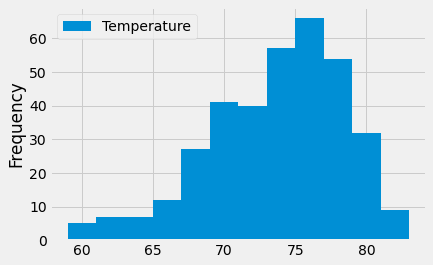

In [27]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#USC00519281, this station and last 12 months of data and do histogram on this
station, Temp = session.query(Measurements.station, func.count(Measurements.station)).group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).first()


MaxDate, PrevYear = session.query(func.max(Measurements.date),func.date(func.max(Measurements.date), "-12 months")).filter(Measurements.station == station).first()

Results = session.query(Measurements.date, Measurements.tobs).filter(Measurements.station == station, Measurements.date >= PrevYear, Measurements.date <= MaxDate).\
            order_by(Measurements.date)

TempQuery = Results.all()
TempQueryDf = pd.DataFrame(TempQuery, columns = ["Date", "Temperature"])
TempQueryDf.plot.hist(bins = 12)



## Bonus Challenge Assignment

In [1]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'session' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
